In [6]:
import pandas as pd

# read data
data0=pd.read_csv('data/total_confirmed.csv')

# %Y - year including the century
# %m - month (01 to 12)
# %d - day of the month (01 to 31)
data0['Date']=pd.to_datetime(data0['Date'], format="%m/%d/%y")


In [8]:
X = data0.iloc[:, 1:2].values
y = data0.iloc[:, 2].values

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [18]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def visualize_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Wuhan Coronavirus Confirmed Cases (Polynomial Regression)')
    plt.xlabel('Days passed')
    plt.ylabel('Confirmed cases')
    plt.show()
    return

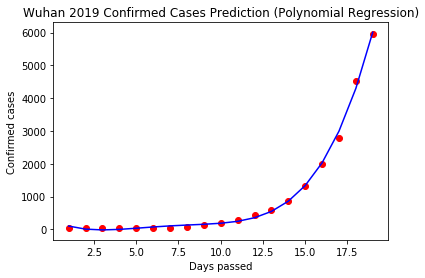

In [19]:
visualize_polymonial()

In [273]:
# The SIR model in the form of differential equations.
def sir_differential_form(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [274]:
# simulate function
def simulate(N, I0, Re, gamma, R0, days):
    # Susceptible population
    S0 = N - I0 - R0

    # Contact rate, beta
    beta0 = gamma * R0

    t = np.linspace(0, unit_per_day*days, unit_per_day*days)

    # Initial conditions vector
    y0 = S0, I0, Re

    # Integrate over time grid
    res = odeint(sir_differential_form, y0, t, args=(N, beta0, gamma))
    S, I, R = res.T
    return S,I,R

In [293]:
import numpy as np
from scipy.integrate import odeint

unit_per_day = 1
days_in_P1 = 53 # 12/01/2019 to 01/23/2020
days_in_P2 = 30 # 60 days after 01/23/2020

########### Phase 1 ###########

# day 1 set to Dec. 1st, 2019.
# On 8 December 2019, the first patient was recorded by Chinese authorities to start showing symptoms. 
# A later Chinese report finds an earlier case on 1 December, pointing to an even earlier origin.


S_P1, I_P1, R_P1 = simulate(1400000000,            # Total population, N.
                            1,0,                   # Initial cases and recovery cases
                            1.0/(10*unit_per_day), # Mean recovery rate, gamma (10 days), unit in 1/hours
                            2.9,                   # Basic reproduction rate
                            days_in_P1)

In [276]:
########### Phase 2 ###########

# starting points for Phase2
Re_P2 = R_P1[-1]
I0_P2 = I_P1[-1]
S0_P2 = S_P1[-1]
y0_P2 = S0_P2, I0_P2, Re_P2

S_P2, I_P2, R_P2 = simulate(1400000000,            
              I0_P2,Re_P2,
              1.0/(10*unit_per_day),
              2.9 * 0.2, # Effective contact rate in P2
              days_in_P2)

In [277]:
# data concatenation
S = np.concatenate((S_P1, S_P2), axis=0)
I = np.concatenate((I_P1, I_P2), axis=0)
R = np.concatenate((R_P1, R_P2), axis=0)
t = np.linspace(0, unit_per_day*(days_in_P1 + days_in_P2), unit_per_day*(days_in_P1 + days_in_P2))

In [327]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import seaborn as sns

# Plot function
def plott(S, I, R, t, title):
    fig = plt.figure(facecolor='w', figsize=(12, 6))
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered/Immune')
    ax.set_xlabel('Days')
    ax.set_ylabel('Count')

    ax.set_ylim(0,50000)
    #ax.yaxis.set_tick_params(length=0)
    #ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.title(title)
    plt.show()

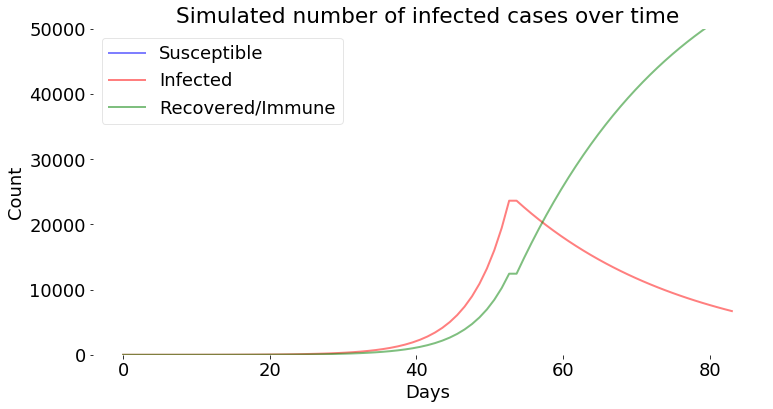

In [328]:
plott(S, I, R, t, 'Simulated number of infected cases over time')

In [329]:
# Study without transportation shut
S_prime, I_prime, R_prime = simulate(1400000000,           
                            1,0,                   
                            1.0/(10*unit_per_day), 
                            2.9,                   
                            days_in_P1 + days_in_P2)

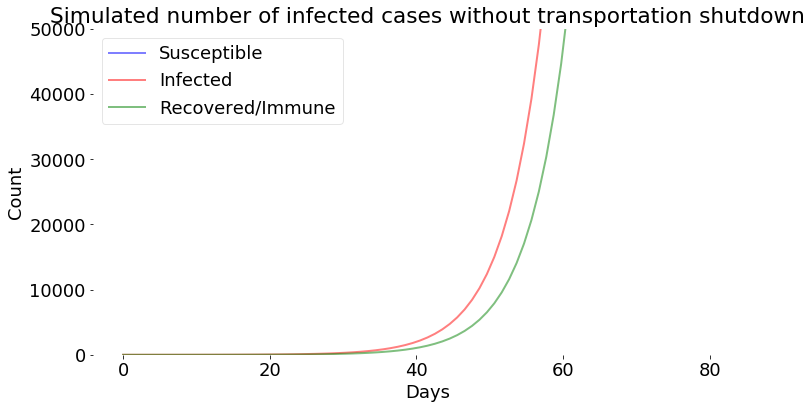

In [330]:
plott(S_prime, I_prime, R_prime, np.linspace(0, unit_per_day*(days_in_P1 + days_in_P2), unit_per_day*(days_in_P1 + days_in_P2)), 'Simulated number of infected cases without transportation shutdown')

In [322]:
I_prime[54] - I_prime[53]

5663.492478429118

In [331]:
I[53]

23622.639811739173